In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

#60 bin el yazması rakamnların sınıflandırılması

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist =keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images,

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [2]:
from matplotlib import pyplot as plt
plt.imshow(train_images[8569],cmap="gray")


NameError: name 'train_images' is not defined

In [8]:
train_labels[8569]

5

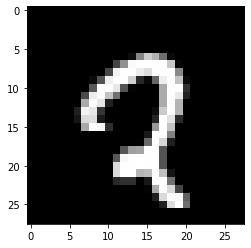

In [9]:
plt.imshow(train_images[854],cmap="gray")


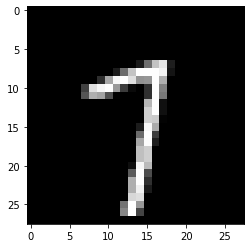

In [10]:
plt.imshow(train_images[42],cmap="gray")


In [11]:
#Normalize ediyoruz resimleri
train_images=train_images/255.0
test_images=test_images/255.0

In [12]:
#Define the model architectrue
# Modelin mimarisini oluşturalım

model=keras.Sequential ([
    keras.layers.InputLayer(input_shape=(28,28)),
    keras.layers.Reshape(target_shape=(28,28,1)),
    keras.layers.Conv2D( filters=12 , kernel_size=(3,3) , activation=tf.nn.relu ),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten() ,
    keras.layers.Dense(10) ,
])
# her resim 28 piksele 28 piksel o yüzden input_shape=(28,28) (1.)
# tamam 28 piksel ama onun 1 yani gri olduğunu gösteren bir şeyimiz yok bu sebeple bunu reshape(yeniden sekillendirmek)yapıyoruz(2.)
# derin öğrenme resimlere kendi ürettiği filtereleri kullanrak daha iyi sonuç buluyor Burda 12. fitreyi kullanıyor(3.)
# MaxPooling2D = aynı sayılardaki batch size gibi mesela bu örnekte hep 2 ye 2 piksel alıp götürcek(4.)
#Flatten bu layerlar katman katman Flatten bunları birleştiriyor (5.)
#

# CNN- Convolution Neural Networks 

In [13]:
# Train the digit classification model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [14]:
from traitlets.traitlets import validate
model.fit(train_images,train_labels,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.2791 - accuracy: 0.9223 - val_loss: 0.1073 - val_accuracy: 0.9707
Epoch 2/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1063 - accuracy: 0.9693 - val_loss: 0.0813 - val_accuracy: 0.9793
Epoch 3/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0810 - accuracy: 0.9755 - val_loss: 0.0698 - val_accuracy: 0.9832
Epoch 4/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0673 - accuracy: 0.9799 - val_loss: 0.0670 - val_accuracy: 0.9817
Epoch 5/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0578 - accuracy: 0.9830 - val_loss: 0.0630 - val_accuracy: 0.9833
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0640 - val_accuracy: 0.9823
Epoch 7/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.0634 -

In [15]:
_, accuracy=model.evaluate(test_images,test_labels)
# Normalde accuracy ile beraber bir şey daha var ama onu kullanmıcaz o sebeten mütevellit _, ile başladık . yani onu görmezden geldik
print("Accuracy:%.2f"%(accuracy*100))


313/313 [==============================] - 2s 6ms/step - loss: 0.0552 - accuracy: 0.9839
Accuracy:98.39
